In [1]:
import matplotlib.pyplot as plt
# Set up the matplotlib figure
plt.rc("axes", titlesize=30, titleweight="bold") #fontsize of the title
plt.rc("axes", labelsize=30) #fontsize of the x and y labels
plt.rc("xtick", labelsize=25) #fontsize of the x tick labels
plt.rc("ytick", labelsize=25) #fontsize of the y tick labels
plt.rc("legend", fontsize=25) #fontsize of the legend

## LoRA Memory Experiment

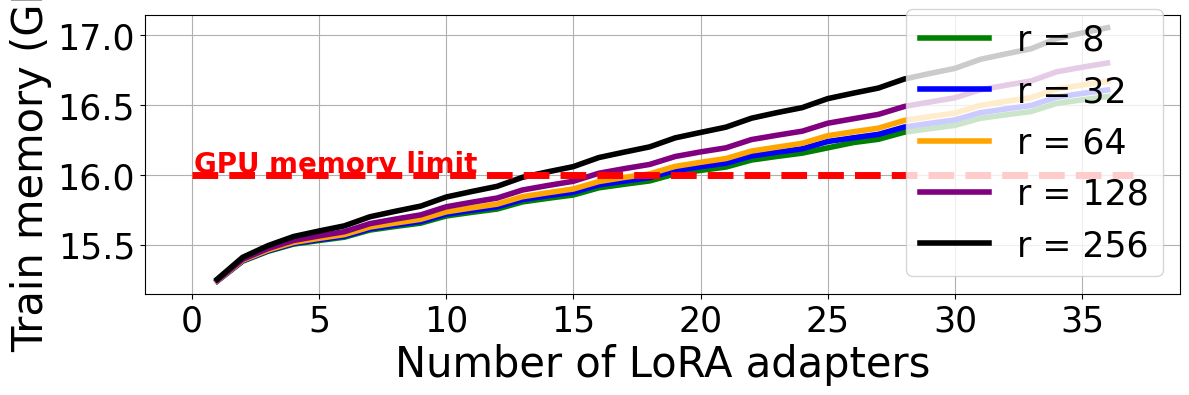

In [8]:
plt.figure(figsize=(12, 4))
bs = 64
#plt.title(f"LoRA memory plot. Batch size = {bs}")
plt.ylabel("Train memory (GB)")
plt.xlabel("Number of LoRA adapters")
SAVING = True
colors = ["green", "blue", "orange", "purple", "black"]
for r, color in zip([8, 32, 64, 128, 256], colors):
    x, y = [], []
    with open(f"memory_data/mem_{r}_{bs}.txt", "r") as f:
        a = f.readlines()
    for line in a:
        x.append(int(line.split()[0].split("=")[1][:-1]))
        y.append(float(line.split()[1])+3.5)
    plt.plot(x, y, label=f"r = {r}", linewidth=4, color=color)
memory_limit_gb = 16
plt.hlines(y=memory_limit_gb, xmin=0, xmax=37, color="red", 
           linestyles="--", linewidth=5)
#plt.fill_between(x, mean-std, mean+std, alpha=0.2, color=color)
plt.text(x=0.1, y=memory_limit_gb+0.02, s="GPU memory limit", color="red",
         fontsize=20, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="lower right")
if SAVING:
    plt.savefig(f"./figures/lora_memory_bs_{bs}.pdf",
                format="pdf", bbox_inches="tight")
    plt.savefig(f"./figures/lora_memory_bs_{bs}.png",
                format="png", bbox_inches="tight")
plt.show()

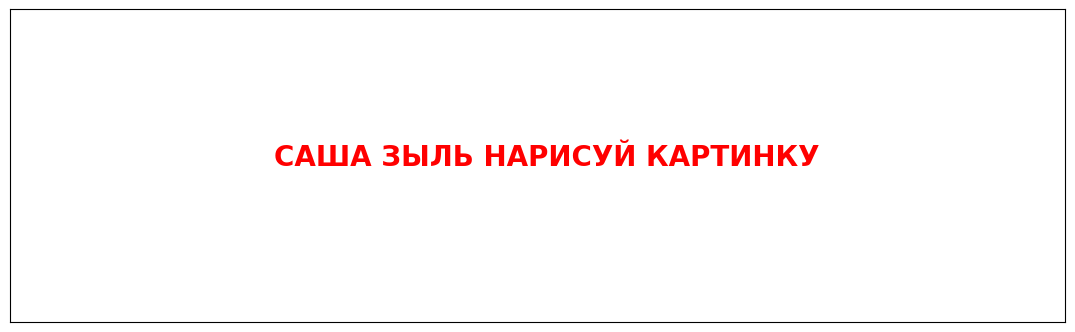

In [10]:
plt.figure(figsize=(12, 4))
SAVING = True
plt.text(x=0.25, y=0.5, s="САША ЗЫЛЬ НАРИСУЙ КАРТИНКУ", color="red",
         fontsize=20, fontweight="bold")
plt.tight_layout()
plt.xticks([])
plt.yticks([])
if SAVING:
    plt.savefig(f"./figures/tmp.pdf",
                format="pdf", bbox_inches="tight")
plt.show()

## Dot Prod Experiment

In [42]:
exp_res_5 = {
    "active_adapters_1": "value#8",
    "active_adapters_2": "key#10",
    "active_adapters_3": "value#10",
    "active_adapters_4": "query#11",
    "active_adapters_5": "value#11",
}
exp_res_10 = {
    "active_adapters_1": "query#3",
    "active_adapters_10": "value#11",
    "active_adapters_2": "key#3",
    "active_adapters_3": "value#4",
    "active_adapters_4": "value#8",
    "active_adapters_5": "value#9",
    "active_adapters_6": "key#10",
    "active_adapters_7": "value#10",
    "active_adapters_8": "query#11",
    "active_adapters_9": "key#11",
}

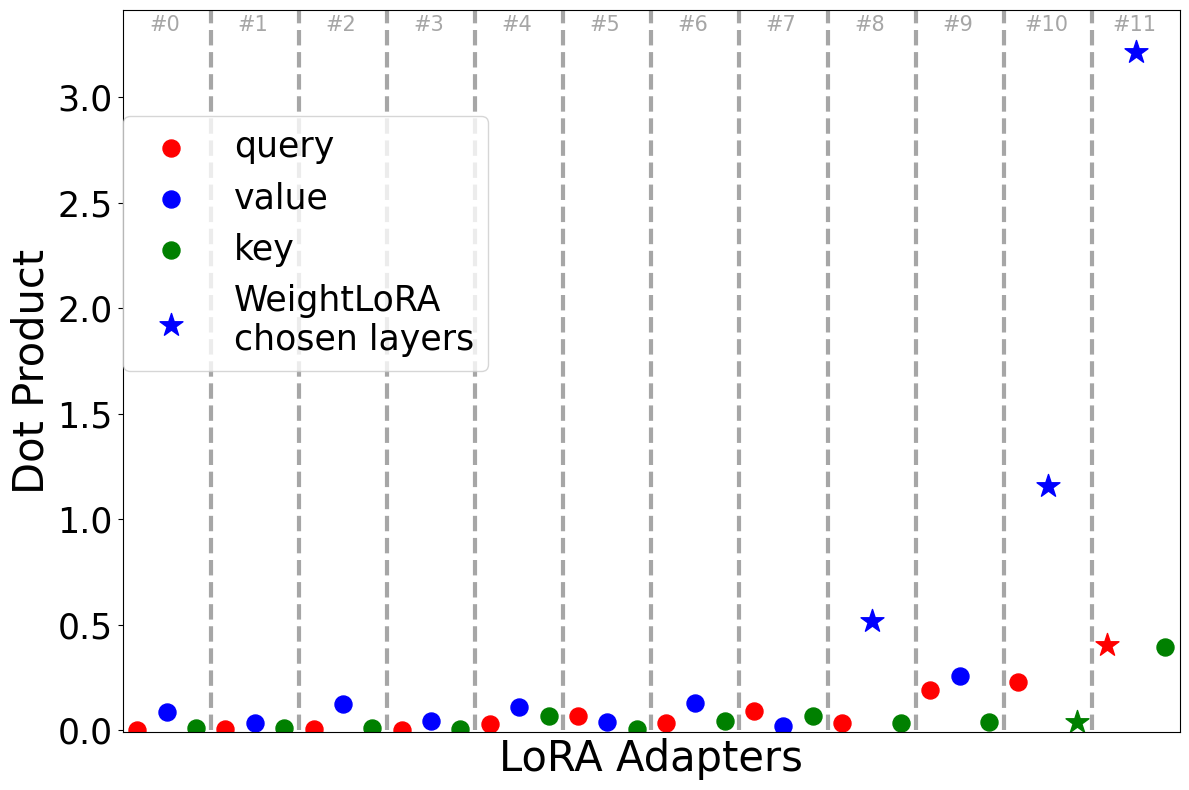

In [ ]:
plt.figure(figsize=(12, 8))
model, task = "deberta", "mnli"
#plt.title(f"Dot Prod Experiment")
plt.xlabel("LoRA Adapters")
plt.ylabel("Dot Product")
SAVING = False
with open(f"dotprod_data/{model}_{task}_no_norm.txt", "r") as f:
    a = f.readlines()
names, y_list = [], []
for line in a:
    names.append(line.split(":")[0].split("[")[1][:-1])
    y_list.append(abs(float(line.split(":")[1])))

y_max = max(y_list)
alpha, lv, lt = 0.7, 0.2, 0.1
star_marker_flag = True
for i, (name, y) in enumerate(zip(names, y_list)):
    if "query" in name:
        color, label = "red", "query"
    elif "key" in name:
        color, label = "green", "key"
    else:
        color, label = "blue", "value"
    marker, s = ("*", 300) if name in exp_res_5.values() else ("o", 150)
    if i >= 3: 
        if name in exp_res_5.values() and star_marker_flag:
            label = "WeightLoRA\nchosen layers"
            star_marker_flag = False
        else:
            label = None
    plt.scatter(i, y, label=label, marker=marker, s=s, color=color)
    if i % 3 == 0:
        if i > 0:
            plt.vlines(x=i-0.5, ymin=0, ymax=y_max+lv, color="grey", alpha=alpha,
                    linestyles="--", linewidth=3)
        delta = 0.4 if i < 30 else 0.2
        plt.text(x=i+delta, y=y_max+lt, s=f"#{i // 3}", color="grey", alpha=alpha,
                 fontsize=15)
plt.xticks([])
plt.ylim(-0.01, y_max+0.2)
plt.xlim(-0.5, 35.5)
plt.grid(False)
plt.tight_layout()
plt.legend(loc=(0, 0.5))
if SAVING:
    plt.savefig(f"./figures/dotprod_{model}_{task}.pdf",
                format="pdf", bbox_inches="tight")
    plt.savefig(f"./figures/dotprod_{model}_{task}.png",
                format="png", bbox_inches="tight")
plt.show()

In [ ]:
plt.Circle((i, y), 10, color="black", fill=False)
plt.show()